In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import ast

%matplotlib inline

In [2]:
df = pd.read_csv('assets/glassdoor_current.csv')
print(len(df))
df.head(2)

583


,title,dateposted,validthrough,industry,orgname,cat,descr,stars,jobid,minsal,maxsal,medsal,empid,jobtitleid,jobreqid,url
0,Data Scientist,2019-01-22,2019-02-22,NaN,AllazoHealth,"['15-1111.00', 'Computer and Information Resea...",Company: AllazoHealth Location: New York City...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.glassdoor.com/partner/jobListing.ht...
1,Junior Data Scientist,2019-01-15,2019-02-22,Media,Viacom,"['15-1111.00', 'Computer and Information Resea...","The Junior Data Science Engineer, Advanced Med...",3.3,3.030758e+09,100000.0,158000.0,127000.0,40260.0,406074.0,3.700016e+09,http://www.glassdoor.com/partner/jobListing.ht...


In [3]:
df.isnull().sum()[df.isnull().sum() != 0]

industry       43
cat             2
stars          33
jobid         196
minsal        196
maxsal        196
medsal        196
empid         196
jobtitleid    196
jobreqid      196
dtype: int64

In [4]:
df = df[pd.notnull(df['title'])]

In [5]:
## https://wiki.python.org/moin/EscapingHtml

def unescape(s):
    s = s.replace('&amp;', '&')
    s = s.replace('&lt;', '<')
    s = s.replace('&gt;', '>')
    s = s.replace('&amp;', '&')
    s = s.replace('&#039;', '\'')
    return s

### title

In [6]:
df['title'] = [unescape(x) for x in df['title']]
df['title'].value_counts()[df['title'].value_counts() > 2]

Data Scientist                   42
Data Engineer                    21
Senior Data Scientist            15
Senior Data Engineer              9
Data Analyst                      7
Lead Data Scientist               6
Sr. Data Engineer                 6
Senior Data Analyst               5
Lead Data Engineer                4
Principal Data Scientist          4
Sr. Data Scientist                4
Data Scientist, Analytics         3
Senior Quantitative Analyst       3
Business Intelligence Analyst     3
Data Architect                    3
Big Data Engineer                 3
Sr. Data Analyst                  3
Name: title, dtype: int64

### industry

In [7]:
df.loc[df['industry'].isnull(), 'orgname'].value_counts()

IBM                                            3
BlueRock Therapeutics                          3
Disney Streaming Services                      2
HopHR                                          2
Structure Networks Inc.                        1
Oath                                           1
BridgePoint Associates                         1
AC Lion (2)                                    1
Cardinal Integrated Technologies Inc           1
Futran Solutions Inc                           1
QuadPay                                        1
Strategic Employment Partners                  1
WW International (formerly Weight Watchers)    1
Brains Workgroup, Inc.                         1
Rockstar New York                              1
Publicis Spine                                 1
Slice                                          1
Edison Software, Inc.                          1
AllazoHealth                                   1
ingenium.agency                                1
Dhalite             

In [8]:
df.loc[df['industry'].isnull(), 'industry'] = [' '.join([str(x), '(industry not given)']) for x in df.loc[df['industry'].isnull(), 'orgname']]

In [9]:
df['industry'] = [unescape(x) for x in df['industry']]
df['industry'].value_counts()

Information Technology                                              136
Business Services                                                   125
Finance                                                              82
Accounting & Legal                                                   45
Media                                                                40
Health Care                                                          29
Insurance                                                            26
Education                                                             8
Retail                                                                8
Biotech & Pharmaceuticals                                             7
Non-Profit                                                            7
Telecommunications                                                    6
Travel & Tourism                                                      5
Consumer Services                                               

### organization name & employer ID

In [10]:
df.loc[df['orgname'].isnull(), 'orgname'] = [' '.join([str(x), '(orgname not given)']) for x in df.loc[df['orgname'].isnull(), 'orgname']]

In [11]:
df['orgname'] = [unescape(x) for x in df['orgname']]

In [12]:
empIDs = list(df['empid'].value_counts()[df['empid'].value_counts() > 1].index)

orgname_dict = {}
for id_ in empIDs:
    listy = df.loc[df['empid'] == id_, 'orgname'].value_counts()
    firstname = list(df.loc[df['empid'] == id_, 'orgname'].value_counts().index)[0]
    orgname_dict.update({id_ : firstname})
#     if len(listy) > 1:
#         print(id_, '\n', list(listy.index), '\n')
df['orgname'] = [orgname_dict[df.loc[i, 'empid']] if df.loc[i, 'empid'] in list(orgname_dict.keys()) else df.loc[i, 'orgname'] for i in list(df.index)]

In [13]:
df['orgname'].value_counts()[df['orgname'].value_counts() > 2]

KPMG                               21
Deloitte                           19
Amazon                             14
J.P. Morgan                        12
New York Life                      11
Two Sigma                          10
Capital One                         8
Averity                             7
GQR Global Markets                  7
Citibank                            6
EXL Service                         6
CyberCoders                         5
Mount Sinai Health System           5
CBS Corporation                     5
NJF Global Holdings                 5
NYU Langone Medical Center          5
Aetna                               5
Open Systems Technologies (NYC)     5
Spotify                             4
WeWork                              4
24 Seven Talent                     4
Memorial Sloan-Kettering            4
Integral Ad Science                 4
Adobe                               4
HBO                                 4
Button                              3
Partners In 

### description

In [14]:
df['descr'] = [BeautifulSoup(unescape(x.encode().decode('utf-8')), 'lxml').get_text(' ') for x in df['descr']]
df['descr'] = [x.replace(' n ', '').replace(' xa0 ', '').replace('.n ', '. ').replace(' xa0n ', ' ') for x in df['descr']]
df['descr'].head()

0    Company: AllazoHealth Location: New York City ...
1    The Junior Data Science Engineer, Advanced Med...
2    The Analytics team is looking for Data Scienti...
3    The Organization JUST Capital , an independent...
4    The Data team works closely with our product, ...
Name: descr, dtype: object

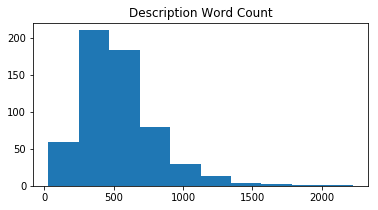

In [15]:
plt.figure(figsize = (6, 3))
df['descr'].apply(lambda x: len(x.split(' '))).hist()
plt.title('Description Word Count')
plt.grid(False)
plt.show();

### stars

In [16]:
df.loc[df['stars'].isnull(), 'orgname'].value_counts()

BlueRock Therapeutics                          3
Disney Streaming Services                      2
Edward Daniels Group                           2
HopHR                                          2
Spertaj LLC                                    1
AC Lion (2)                                    1
WW International (formerly Weight Watchers)    1
Edison Software, Inc.                          1
Slice                                          1
QuadPay                                        1
Publicis Spine                                 1
Structure Networks Inc.                        1
Cardinal Integrated Technologies Inc           1
BridgePoint Associates                         1
Jefferson Frank                                1
Brains Workgroup, Inc.                         1
Pierce Technology Corporation                  1
Rockstar New York                              1
qualifIQ                                       1
blackbird.ai                                   1
VortexLink          

In [17]:
df = df[pd.notnull(df['stars'])]

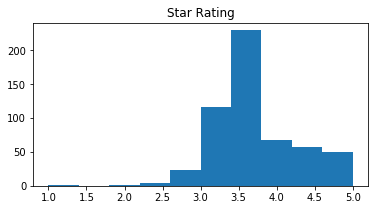

In [18]:
plt.figure(figsize = (6, 3))
df['stars'].hist()
plt.title('Star Rating')
plt.grid(False)
plt.show();

### job ID

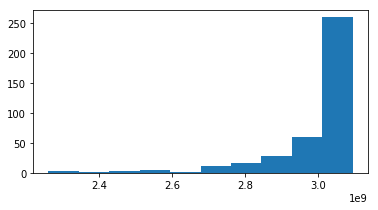

In [19]:
plt.figure(figsize = (6, 3))
df['jobid'].hist()
plt.grid(False)
plt.show();

### jobtitleid

In [20]:
df['jobtitleid'].value_counts().head()

-1.0         179
 119899.0     41
 46157.0      21
 160524.0     15
 274009.0     14
Name: jobtitleid, dtype: int64

In [21]:
jobtitleid_dict = {}
for jobtitleid in list(df['jobtitleid'].value_counts().index):
    if jobtitleid == -1:
        pass
    else:
        x = df.loc[df['jobtitleid'] == jobtitleid, 'title'].value_counts()
        jobtitleid_dict.update({jobtitleid : (x.index)[0]})
#         if x.sum() > 1:
#             print(str(jobtitleid) + '    ', '\t', x.sum(), '\t', list(x.index))
df['title'] = [jobtitleid_dict[df.loc[i, 'jobtitleid']] if df.loc[i, 'jobtitleid'] in list(jobtitleid_dict.keys()) else df.loc[i, 'title'] for i in list(df.index)]

### salary

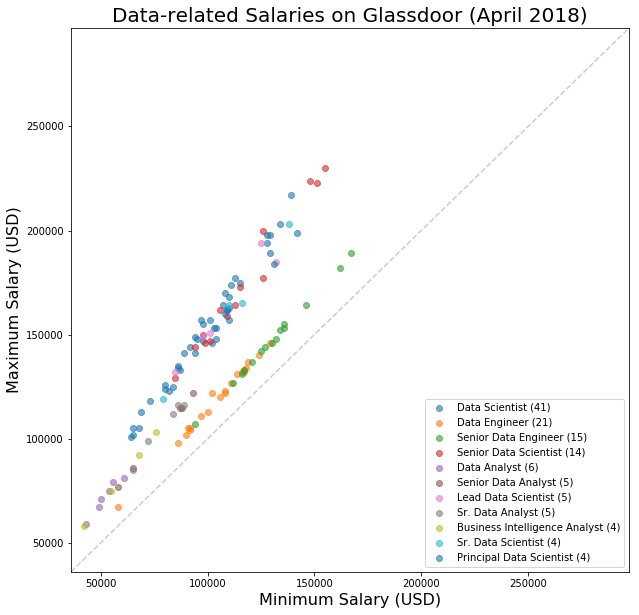

In [22]:
plt.figure(figsize = (10, 10))

for jobtitleid in list(df['jobtitleid'].value_counts().index):
    lil_df = df.loc[df['jobtitleid'] == jobtitleid, ['minsal', 'maxsal']]
    if jobtitleid == -1:
        pass
    elif len(lil_df) > 3:
        plt.scatter(lil_df['minsal'], lil_df['maxsal'], label = ' '.join([jobtitleid_dict[jobtitleid], '({})'.format(len(lil_df))]), alpha = 0.6)
plt.title('Data-related Salaries on Glassdoor (April 2018)', fontsize = 20)
plt.xlabel('Minimum Salary (USD)', fontsize = 16)
plt.ylabel('Maximum Salary (USD)', fontsize = 16)
plt.xlim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.ylim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.plot([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], [0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], ls = '--', color = 'gray', alpha = 0.4)
plt.legend(loc = 'lower right', fontsize = 10)
plt.show();

### category

In [23]:
df['cat'].value_counts()

['15-1111.00', 'Computer and Information Research Scientists']                  187
['15-1132.00', 'Software Developers, Applications']                             109
['13-1111.00', 'Management Analysts']                                            93
['11-2021.00', 'Marketing Managers']                                             24
['11-3021.00', 'Computer and Information Systems Managers']                      20
['13-1161.00', 'Market Research Analysts and Marketing Specialists']             16
['19-1042.00', 'Medical Scientists, Except Epidemiologists']                     15
['13-2099.01', 'Financial Quantitative Analysts']                                13
['15-1199.06', 'Database Architects']                                             9
['15-1199.08', 'Business Intelligence Analysts']                                  8
['19-4061.00', 'Social Science Research Assistants']                              6
['19-1029.01', 'Bioinformatics Scientists']                                 

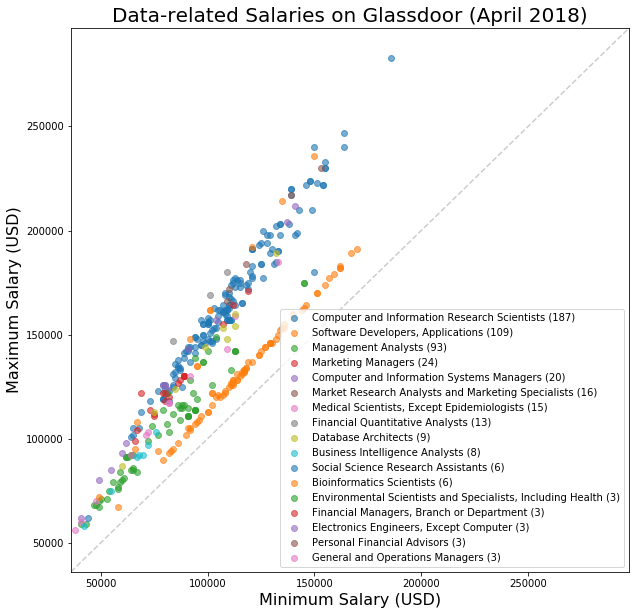

In [24]:
plt.figure(figsize = (10, 10))

for cat in list(df['cat'].value_counts().index):
    lil_label = ast.literal_eval(cat)[1]
    lil_df = df.loc[df['cat'] == cat, ['minsal', 'maxsal']]
    if len(lil_df) > 2:
        plt.scatter(lil_df['minsal'], lil_df['maxsal'], label = '{} ({})'.format(lil_label, len(lil_df)), alpha = 0.6)

plt.title('Data-related Salaries on Glassdoor (April 2018)', fontsize = 20)
plt.legend(loc = 'best', fontsize = 10)
plt.xlim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.ylim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.plot([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], [0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], ls = '--', color = 'gray', alpha = 0.4)
plt.xlabel('Minimum Salary (USD)', fontsize = 16)
plt.ylabel('Maximum Salary (USD)', fontsize = 16)
plt.show();

In [25]:
df.to_csv('assets/glassdoor_clean.csv', index = False)